Defaulting to user installation because normal site-packages is not writeable
   Age  Salary  Purchased
0   58   72107          1
1   48  116202          1
2   34   81663          1
3   27   45708          0
4   40   79811          0
✅ Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        22
           1       0.38      0.33      0.35        18

    accuracy                           0.45        40
   macro avg       0.44      0.44      0.44        40
weighted avg       0.44      0.45      0.45        40



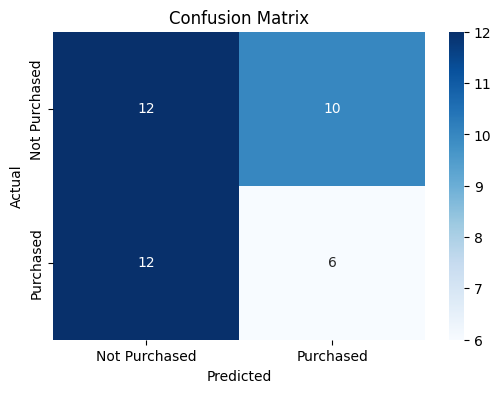

In [2]:
!pip install imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 📌 Load dataset
file_path = "customer_data.csv"  
df = pd.read_csv(file_path)

# 🔍 Inspect the dataset
print(df.head())

# 📌 Define features (X) and target variable (y)
X = df.drop(columns=["Purchased"])  # Independent variables
y = df["Purchased"]  # Dependent variable

# 🔀 Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📊 Handle Class Imbalance using SMOTE (if needed)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 🔧 Feature Scaling (for numerical stability)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 🚀 Train a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

# 🎯 Make predictions
y_pred = rf_model.predict(X_test_scaled)

# 📊 Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# 🔍 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Purchased", "Purchased"], yticklabels=["Not Purchased", "Purchased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
